In [8]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib

# 改style要在改font之前
# plt.style.use('seaborn')

matplotlib.font_manager.fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
matplotlib.rc('font', family='Taipei Sans TC Beta')

--2025-01-12 09:32:16--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 172.253.122.100, 172.253.122.102, 172.253.122.139, ...
Connecting to drive.google.com (drive.google.com)|172.253.122.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2025-01-12 09:32:17--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.253.115.132, 2607:f8b0:4004:c1f::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.253.115.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M  39.6MB/s    in 0.5s    

2025-01-12 

# 電子酒精交易所模擬

[{'interval': 0, 'sales_volume': {'B1': 1844.1416770891542, 'B2': 1589.2285318428094, 'B3': 1466.4025449343096, 'C1': 845.6032293454017, 'C10': 457.39974952476246, 'C12': 316.75372607107977, 'C2': 303.7779656127264, 'C4': 104.74582816171744, 'C6': 355.96200645416684, 'C7': 144.30616250359074, 'C9': 380.1366794430413, 'NA1': 808.6645536600705, 'NA2': 654.1058452409287, 'NA3': 1551.3360374767653, 'NA4': 239.35175696204743, 'NA5': 1173.904332358869}, 'cumulative_sales': {'NA1': 0, 'NA2': 0, 'NA3': 0, 'NA4': 0, 'NA5': 0, 'C1': 0, 'C2': 0, 'C3': 0, 'C4': 0, 'C5': 0, 'C6': 0, 'C7': 0, 'C8': 0, 'C9': 0, 'C10': 0, 'C11': 0, 'C12': 0, 'B1': 0, 'B2': 0, 'B3': 0}, 'prices': {'NA1': 0.24119999999999997, 'NA2': 0.24119999999999997, 'NA3': 0.24359999999999996, 'NA4': 0.24, 'NA5': 0.1616, 'C1': 0.9647999999999999, 'C2': 0.8, 'C3': 1.0752000000000002, 'C4': 0.92, 'C5': 0.96, 'C6': 1.57, 'C7': 1.12, 'C8': 1.3439999999999999, 'C9': 0.8, 'C10': 1.4, 'C11': 1.152, 'C12': 3.2, 'B1': 0.40599999999999997, 'B

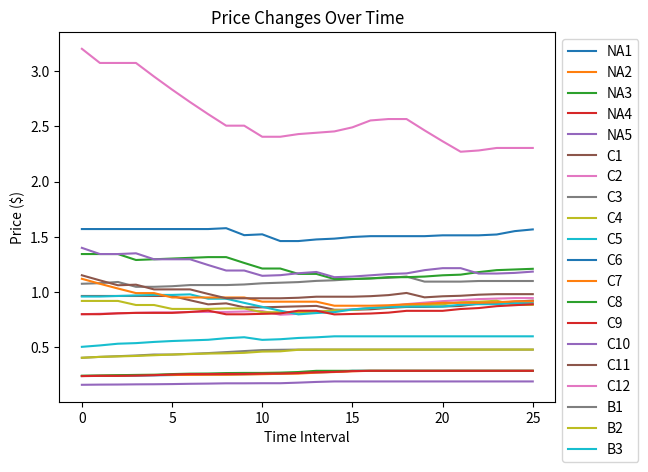

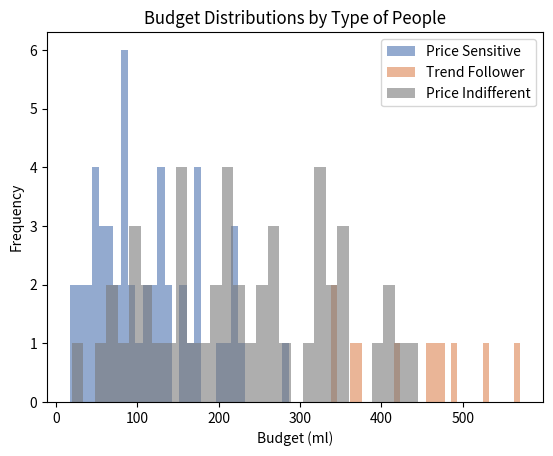

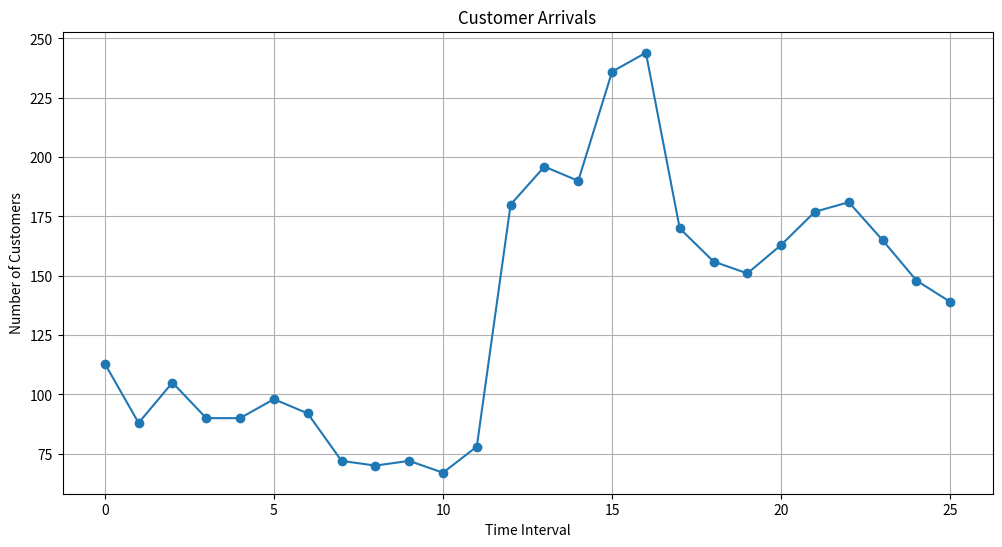

靜態定價總收益: 271628.15
動態定價總收益: 360094.75


In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.stats import beta

np.random.seed(5566)

# 基本參數設定
open_time = 11  # 營業開始時間 (上午 11:00)
close_time = 24  # 營業結束時間 (午夜 00:00)
hours_per_day = close_time - open_time  # 營業總時長（小時）
num_intervals = hours_per_day * 2  # 每天 26 個半小時時段
num_beer_types = 20  # 啤酒款數
price_increase_rate = 0.005  # 每 500ml 銷售量價格上漲比例 (0.5%)
price_decrease_rate = 0.04   # 無銷售價格下降比例 (4%)
volume_for_price_increase = 500  # 價格上漲所需累積銷量 (ml)
price_limit_up = 1.2  # 漲停幅度 (120%)
price_limit_down = 0.5  # 跌停幅度 (50%)

# 客人類型設定
type_people_weights = {
    "price_sensitive": 0.4,  # 價格敏感型
    "trend_follower": 0.1,   # 追高者
    "price_indifferent": 0.5 # 價格無感型
}

drink_preferences = {
    "non_alcoholic": {"NA": 1.0},
    "alcoholic": {"C": 0.5,"B":0.5},
    "beer_lover": {"B": 0.6, "C": 0.3,"NA":0.1},
    "cocktail_lover": {"C": 0.6, "B": 0.3,"NA":0.1}
}

# 模擬過程變數
initial_price_data = [
    {"code": "NA1", "type": "Non-Alcoholic", "name": "Red Oolong Kombucha", "price": 0.24},
    {"code": "NA2", "type": "Non-Alcoholic", "name": "Peach Sparkling Drink", "price": 0.24},
    {"code": "NA3", "type": "Non-Alcoholic", "name": "Handcrafted Cola", "price": 0.24},
    {"code": "NA4", "type": "Non-Alcoholic", "name": "Honey Sparkling Drink", "price": 0.24},
    {"code": "NA5", "type": "Non-Alcoholic", "name": "Lemon Sparkling Drink", "price": 0.16},
    {"code": "C1", "type": "Cocktail", "name": "Earl Grey Cocktail", "price": 0.96},
    {"code": "C2", "type": "Cocktail", "name": "Grapefruit Lychee Gin", "price": 0.80},
    {"code": "C3", "type": "Cocktail", "name": "Classic Mojito", "price": 1.12},
    {"code": "C4", "type": "Cocktail", "name": "Wintermelon Whiskey", "price": 0.92},
    {"code": "C5", "type": "Cocktail", "name": "Gin Soda", "price": 1.00},
    {"code": "C6", "type": "Cocktail", "name": "Black Tea Plum Wine", "price": 1.57},
    {"code": "C7", "type": "Cocktail", "name": "Sunshine Mai Tai", "price": 1.12},
    {"code": "C8", "type": "Cocktail", "name": "Golden Grapefruit Gin Soda", "price": 1.40},
    {"code": "C9", "type": "Cocktail", "name": "Lemon Margarita", "price": 0.80},
    {"code": "C10", "type": "Cocktail", "name": "Coffee Martini", "price": 1.40},
    {"code": "C11", "type": "Cocktail", "name": "Rose Daiquiri", "price": 1.20},
    {"code": "C12", "type": "Cocktail", "name": "Gin", "price": 3.20},
    {"code": "B1", "type": "Beer", "name": "Kumquat Lemon Beer", "price": 0.40},
    {"code": "B2", "type": "Beer", "name": "Grapefruit IPA", "price": 0.40},
    {"code": "B3", "type": "Beer", "name": "Platinum Draft Beer", "price": 0.50}
]

initial_price_df = pd.DataFrame(initial_price_data)

# 统一生成 base_customers
time_slot_weights = [1, 0.8, 2, 1.5]  # 午餐高峰、下午平缓、晚餐高峰、晚间休闲
base_customers = [
    int(np.random.poisson(100) * time_slot_weights[min(interval // 6, len(time_slot_weights) - 1)])
    for interval in range(num_intervals)
]

# 飲用量當作預算設定 using beta distribution
def generate_budget(type_people):
    if type_people == "price_sensitive":
        a, b = 2, 5  # Skewed towards lower values
        scale = 400
    elif type_people == "trend_follower":
        a, b = 5, 2  # Skewed towards higher values
        scale = 600
    else:  # price_indifferent
        a, b = 2, 2  # Uniform-like distribution
        scale = 500

    return beta.rvs(a, b) * scale

def drink_volume(max_volume):
    return np.random.uniform(50, max_volume)

def get_expanded_drink_preferences():
    """
    根据 drink_preferences 和 expand_drink_codes 合并逻辑，生成具体饮品的选择概率。
    """
    base_preferences = {
        "non_alcoholic": {"NA": 1.0},
        "alcoholic": {"C": 0.5, "B": 0.5},
        "beer_lover": {"B": 0.6, "C": 0.3, "NA": 0.1},
        "cocktail_lover": {"C": 0.6, "B": 0.3, "NA": 0.1},
    }
    expanded_codes = {
        "C": [f"C{i}" for i in range(1, 13)],  # C1-C12
        "B": [f"B{i}" for i in range(1, 4)],   # B1-B3
        "NA": [f"NA{i}" for i in range(1, 6)]  # NA1-NA5
    }

    expanded_preferences = {}
    for preference, categories in base_preferences.items():
        expanded_preferences[preference] = {}
        for category, weight in categories.items():
            if category in expanded_codes:
                # 将类别展开为具体的饮料
                drinks = expanded_codes[category]
                individual_weight = weight / len(drinks)
                for drink in drinks:
                    expanded_preferences[preference][drink] = individual_weight

    return expanded_preferences


# 模擬需求生成函數
def simulate_half_hour_demand(prices, time_slot, previous_prices, num_customers):
    demand_data = []
    budget_records = {"price_sensitive": [], "trend_follower": [], "price_indifferent": []}
    expanded_preferences = get_expanded_drink_preferences()  # 獲取展開後的具體飲品偏好
    period_index = min(time_slot // 6, len(time_slot_weights) - 1)  # 每6個時段屬於一個時間段


    for _ in range(num_customers):
        # 是否會喝酒水
        if np.random.choice([0, 1], p=[0.2, 0.8]) == 0:
            continue  # 該顧客選擇不喝酒水

        # 抽取客人類型
        customer_type = np.random.choice(list(type_people_weights.keys()), p=list(type_people_weights.values()))
        total_demand = np.random.normal(600, 100)  # 每位顧客的總需求 (ml)
        budget = generate_budget(customer_type)
        budget_records[customer_type].append(budget)  # 記錄該客人的預算
        total_demand = min(total_demand, budget)  # 限制ml數預算

        if customer_type == "price_indifferent":
            # 隨機選擇偏好
            preferences = np.random.choice(
                list(expanded_preferences.keys()), p=[0.3, 0.2, 0.3, 0.2]  # 設定選擇每種偏好的概率
            )
            selected_drink = np.random.choice(
                list(expanded_preferences[preferences].keys()),
                p=list(expanded_preferences[preferences].values())
            )
            volume = total_demand
            demand_data.append({"code": selected_drink, "volume_ml": volume, "customer_type": customer_type, "budget": budget})
        elif customer_type == "price_sensitive":
            # 從價格最低的10款中選擇
            price_sorted = sorted(prices.items(), key=lambda x: x[1])  # 按價格升序排序
            top_five_drinks = price_sorted[:10]  # 選擇價格最低的10款
            selected_drink = np.random.choice([drink[0] for drink in top_five_drinks])
            demand_data.append({"code": selected_drink, "volume_ml": total_demand, "customer_type": customer_type, "budget": budget})
        elif customer_type == "trend_follower":
            # 從漲價的飲品中選擇
            increased_price_drinks = [
                code for code in prices.keys()
                if previous_prices.get(code, prices[code]) < prices[code]  # 前半小時價格相比現在價格上漲
            ]

            if increased_price_drinks:
                selected_drink = np.random.choice(increased_price_drinks)
                demand_data.append({"code": selected_drink, "volume_ml": total_demand, "customer_type": customer_type, "budget": budget})

    return pd.DataFrame(demand_data), budget_records

# 動態價格調整函數
def adjust_prices(prices_df, sales_volume, cumulative_sales):
    for drink_code in prices_df['code']:
        # 取得初始價格與當前價格
        base_price = initial_price_df.loc[initial_price_df['code'] == drink_code, 'price'].values[0]
        current_price = prices_df.loc[prices_df['code'] == drink_code, 'price'].values[0]

        # 當前飲品銷量
        current_sales = sales_volume.get(drink_code, 0)

        if current_sales == 0:  # 若無銷量，價格下降，直到達跌停價
            if current_price > base_price * price_limit_down:
                new_price = current_price * (1 - price_decrease_rate)
                prices_df.loc[prices_df['code'] == drink_code, 'price'] = max(new_price, base_price * price_limit_down)

        elif current_sales >= volume_for_price_increase:  # 當前銷量達到500ml倍數時漲價
            # 計算此次漲價的倍數

            num_increases = current_sales // volume_for_price_increase
            # print(drink_code , num_increases)
            new_price = current_price * (1 + num_increases * price_increase_rate)
            prices_df.loc[prices_df['code'] == drink_code, 'price'] = min(new_price, base_price * price_limit_up)

        # 確保價格未超過漲停或跌停範圍
        if prices_df.loc[prices_df['code'] == drink_code, 'price'].values[0] > base_price * price_limit_up:
            prices_df.loc[prices_df['code'] == drink_code, 'price'] = base_price * price_limit_up
        elif prices_df.loc[prices_df['code'] == drink_code, 'price'].values[0] < base_price * price_limit_down:
            prices_df.loc[prices_df['code'] == drink_code, 'price'] = base_price * price_limit_down

        # 重置當前銷量為 0
        sales_volume[drink_code] = 0

# 模擬一日
def simulate_day(prices, base_customers, dynamic_pricing=True):
    cumulative_sales = {code: 0 for code in initial_price_df['code']}
    total_revenue = 0
    all_intervals_data = []  # 用於記錄每個半小時的詳細數據
    customer_arrivals = []

    # 用於統計各種飲料的選擇次數
    total_drink_selection = {code: 0 for code in initial_price_df['code']}
    # 用於統計每種 people_type 的數量
    people_type_count = {"price_sensitive": 0, "trend_follower": 0, "price_indifferent": 0}

    previous_prices = prices.set_index('code')['price'].to_dict()  # 記錄初始價格

    for interval, num_customers in enumerate(base_customers):
        # 模擬當前半小時需求
        demand, budget_records = simulate_half_hour_demand(
            prices.set_index('code')['price'].to_dict(),
            interval,
            previous_prices,
            num_customers  # base_customers[interval # 傳入每半小時的顧客量
        )

        if dynamic_pricing: # 僅在動態定價模式下調整價格
            previous_prices = prices.set_index('code')['price'].to_dict() # 更新 previous_prices 為當前價格

        customer_arrivals.append(num_customers)  # 記錄每時段的顧客量


        # 統計選擇次數
        if not demand.empty:
            drink_counts = demand['code'].value_counts().to_dict()
            for code, count in drink_counts.items():
                total_drink_selection[code] += count

            # 統計當前時段的 people_type
            if 'customer_type' in demand.columns:
                people_counts = demand['customer_type'].value_counts().to_dict()
                for customer_type, count in people_counts.items():
                    if customer_type in people_type_count:
                        people_type_count[customer_type] += count

        # 計算當前半小時銷售數據
        if demand.empty:
            sales_volume = {}
        else:
            sales_volume = demand.groupby('code')['volume_ml'].sum().to_dict()

        revenue = sum(sales_volume.get(drink_code, 0) * prices.loc[prices['code'] == drink_code, 'price'].values[0] for drink_code in prices['code'])
        total_revenue += revenue

        if dynamic_pricing:  # 僅在動態定價模式下調整價格
          adjust_prices(prices, sales_volume, cumulative_sales)

        # 計算當前半小時銷售數據
        sales_volume = demand.groupby('code')['volume_ml'].sum().to_dict()

        # 記錄當前區間的詳細數據
        interval_data = {
            "interval": interval,
            "sales_volume": sales_volume,
            "cumulative_sales": cumulative_sales.copy(),
            "prices": prices.set_index('code')['price'].to_dict(),
            "revenue": revenue,
            "sales_volume": sales_volume.copy()  # 使用 copy 确保存储副本
        }
        all_intervals_data.append(interval_data)

    return total_revenue, all_intervals_data, total_drink_selection, people_type_count, budget_records, customer_arrivals

# 模擬靜態與動態定價
static_prices = initial_price_df.copy()
dynamic_prices = initial_price_df.copy()


# 模擬
static_revenue, all_intervals_data, drink_selection, people_type_count, budget_records, static_customer_arrivals = simulate_day(static_prices,base_customers, dynamic_pricing=False)
dynamic_revenue, all_intervals_data, drink_selection, people_type_count, budget_records, dynamic_customer_arrivals = simulate_day(dynamic_prices,base_customers, dynamic_pricing=True)

print(all_intervals_data)

# 酒水種類選擇統計
print("\nDrink Selection Statistics:")
print(pd.DataFrame.from_dict(drink_selection, orient='index', columns=['Selections']).sort_values(by='Selections', ascending=False))

# people_type統計
print("\nPeople Type Statistics:")
print(pd.DataFrame.from_dict(people_type_count, orient='index', columns=['Count']))

# 需求變化圖
def plot_demand_trends(data):
    time_intervals = list(range(len(data)))
    drink_codes = initial_price_df['code']

    for code in drink_codes:
        demands = [entry['sales_volume'].get(code, 0) for entry in data]
        plt.plot(time_intervals, demands, label=code)

    plt.xlabel('Time Interval')
    plt.ylabel('Demand (ml)')
    plt.title('Demand Trends Over Time for Drinks')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()


# 繪製價格變化圖
def plot_price_changes(data):
    time_intervals = list(range(len(data)))
    drink_codes = initial_price_df['code']

    for code in drink_codes:
        prices = [entry['prices'].get(code, 0) for entry in data]
        plt.plot(time_intervals, prices, label=code)

    plt.xlabel('Time Interval')
    plt.ylabel('Price ($)')
    plt.title('Price Changes Over Time')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

plot_price_changes(all_intervals_data)



# 繪製預算分布
def plot_budget_distributions(total_budget_records):
    samples_price_sensitive = total_budget_records["price_sensitive"]
    samples_trend_follower = total_budget_records["trend_follower"]
    samples_price_indifferent = total_budget_records["price_indifferent"]

    plt.hist(samples_price_sensitive, bins=30, alpha=0.6, label="Price Sensitive", color="#4c72b0")
    plt.hist(samples_trend_follower, bins=30, alpha=0.6, label="Trend Follower", color="#dd8452")
    plt.hist(samples_price_indifferent, bins=30, alpha=0.6, label="Price Indifferent", color="#797979")

    plt.xlabel('Budget (ml)')
    plt.ylabel('Frequency')
    plt.title('Budget Distributions by Type of People')
    plt.legend()
    plt.show()

plot_budget_distributions(budget_records)


def plot_customer_arrivals(customer_arrivals, title):
    plt.figure(figsize=(12, 6))
    plt.plot(range(len(customer_arrivals)), customer_arrivals, marker='o')
    plt.xlabel("Time Interval")
    plt.ylabel("Number of Customers")
    plt.title(title)
    plt.grid()
    plt.show()


# 結論

plot_customer_arrivals(static_customer_arrivals, "Customer Arrivals")

print(f"靜態定價總收益: {static_revenue:.2f}")
print(f"動態定價總收益: {dynamic_revenue:.2f}")




# 繪圖 - 飲品種類分色圖

In [ ]:
import matplotlib.pyplot as plt

# Helper function to map first letter to a color palette
def get_color_map(codes):
    color_map = {}

    # Define harmonious color palettes for each group
    custom_colors = {
        'C': '#4c72b0',  # Muted blue
        'B': 'orange',  # Muted orange
        'N': 'grey',  # Muted grey
    }

    # Assign colors based on the first letter
    for code in codes:
        letter = code[0]
        if letter in custom_colors:
            color_map[code] = custom_colors[letter]

    return color_map

# Updated demand trend plotting function
def plot_demand_trends(data, initial_price_df):
    time_intervals = list(range(len(data)))
    drink_codes = initial_price_df['code']
    color_map = get_color_map(drink_codes)

    for code in drink_codes:
        demands = [entry['sales_volume'].get(code, 0) for entry in data]
        plt.plot(time_intervals, demands, label=code, color=color_map[code])

    plt.xlabel('Time Interval')
    plt.ylabel('Demand (ml)')
    plt.title('Demand Trends Over Time for Drinks')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

# Updated price change plotting function
def plot_price_changes(data, initial_price_df):
    time_intervals = list(range(len(data)))
    drink_codes = initial_price_df['code']
    color_map = get_color_map(drink_codes)

    for code in drink_codes:
        prices = [entry['prices'].get(code, 0) for entry in data]
        plt.plot(time_intervals, prices, label=code, color=color_map[code])

    plt.xlabel('Time Interval')
    plt.ylabel('Price ($)')
    plt.title('Price Changes Over Time')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

# Example function calls (replace `all_intervals_data` and `initial_price_df` with actual data)
plot_demand_trends(all_intervals_data, initial_price_df)
plot_price_changes(all_intervals_data, initial_price_df)


# 檢查動態調價function是否正確

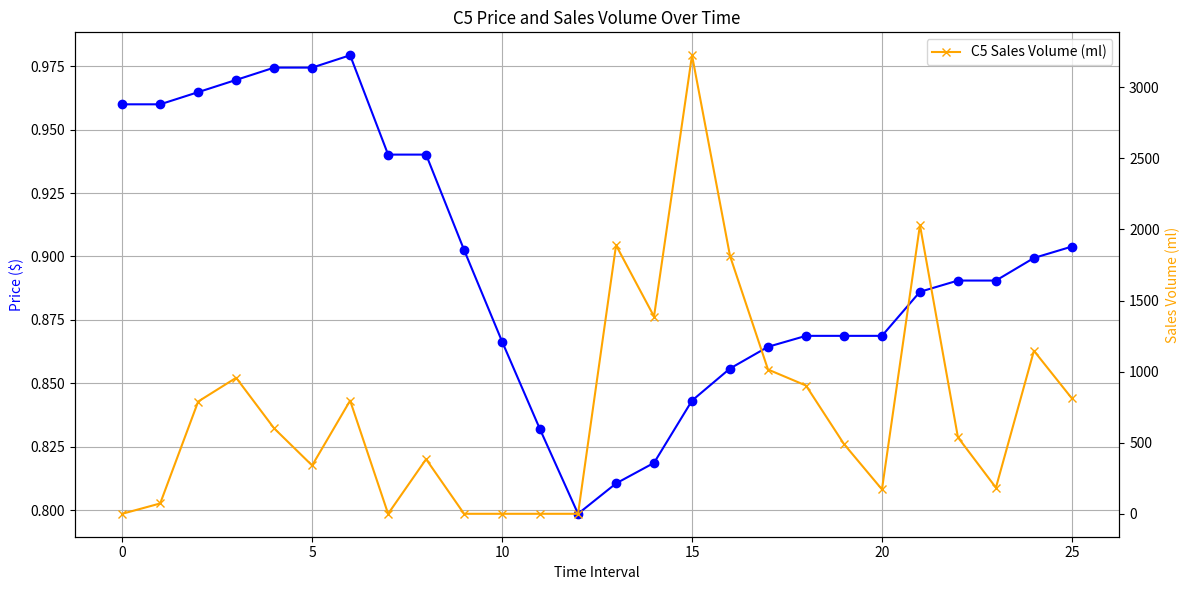

Interval 0: Sales Volume = 0ml, Price = $0.96
Interval 1: Sales Volume = 72.69520743363684ml, Price = $0.96
Interval 2: Sales Volume = 789.6059259426056ml, Price = $0.96
Interval 3: Sales Volume = 956.5990786142793ml, Price = $0.97
Interval 4: Sales Volume = 600.892635087424ml, Price = $0.97
Interval 5: Sales Volume = 339.8329747984433ml, Price = $0.97
Interval 6: Sales Volume = 796.1420015613382ml, Price = $0.98
Interval 7: Sales Volume = 0ml, Price = $0.94
Interval 8: Sales Volume = 384.2068045117899ml, Price = $0.94
Interval 9: Sales Volume = 0ml, Price = $0.90
Interval 10: Sales Volume = 0ml, Price = $0.87
Interval 11: Sales Volume = 0ml, Price = $0.83
Interval 12: Sales Volume = 0ml, Price = $0.80
Interval 13: Sales Volume = 1888.9067484688658ml, Price = $0.81
Interval 14: Sales Volume = 1387.528810122418ml, Price = $0.82
Interval 15: Sales Volume = 3224.9061627620204ml, Price = $0.84
Interval 16: Sales Volume = 1813.629498503749ml, Price = $0.86
Interval 17: Sales Volume = 1014.7

In [10]:
# 繪製 C5 的價格與銷售量變化

def plot_c5_price_and_sales(data):
    time_intervals = list(range(len(data)))  # 時間間隔
    c5_prices = []  # 用於存儲 C5 的價格
    c5_sales_volume = []  # 用於存儲 C5 的銷售量

    for entry in data:
        # 獲取每個時間段 C5 的價格和銷售量
        c5_prices.append(entry['prices'].get('C5', 0))
        c5_sales_volume.append(entry['sales_volume'].get('C5', 0))

    # 繪製價格變化圖
    plt.figure(figsize=(12, 6))
    plt.plot(time_intervals, c5_prices, label='C5 Price ($)', color='blue', marker='o')
    plt.xlabel('Time Interval')
    plt.ylabel('Price ($)', color='blue')
    plt.title('C5 Price and Sales Volume Over Time')
    plt.grid()

    # 建立雙 Y 軸，用於顯示銷售量
    ax2 = plt.gca().twinx()
    ax2.plot(time_intervals, c5_sales_volume, label='C5 Sales Volume (ml)', color='orange', marker='x')
    ax2.set_ylabel('Sales Volume (ml)', color='orange')

    # 添加圖例
    plt.legend(loc='upper left')
    ax2.legend(loc='upper right')
    plt.tight_layout()
    plt.show()

# 調用函數繪製 C5 的價格與銷售量變化
plot_c5_price_and_sales(all_intervals_data)

initial_price_c5 = 1.00  # C5 初始價格為 1.00/ml
for interval, entry in enumerate(all_intervals_data):
    c5_volume = entry['sales_volume'].get('C5', 0)
    c5_price = entry['prices'].get('C5', 0)
    print(f"Interval {interval}: Sales Volume = {c5_volume}ml, Price = ${c5_price:.2f}")




# 分析各飲品在靜態和動態定價中的收益貢獻 及  靜態與動態定價的累積收益圖表。


靜態定價各飲品收益貢獻（美元）:
          Revenue
B3   26339.383741
C12  23569.553867
B2   21406.246037
B1   19750.663300
C9   18629.591538
C2   17167.804939
C6   12270.901156
C7   11354.279262
C8   11259.917660
C3   11244.446431
C11  11176.418204
C10  10385.072385
NA2   9832.205335
C4    9696.528393
NA1   9425.854368
NA4   9315.693127
NA3   9156.268776
C5    6681.972012
NA5   5937.297157
C1    5305.420905

靜態定價各飲品收益佔比（%）:
     Percentage
B3    10.134215
C12    9.068508
B2     8.236164
B1     7.599170
C9     7.167832
C2     6.605402
C6     4.721293
C7     4.368618
C8     4.332312
C3     4.326359
C11    4.300185
C10    3.995711
NA2    3.782992
C4     3.730790
NA1    3.626646
NA4    3.584261
NA3    3.522922
C5     2.570923
NA5    2.284406
C1     2.041288

動態定價各飲品收益貢獻（美元）:
          Revenue
C12  48989.826812
B3   35146.841825
B1   29396.064400
B2   26597.997504
C2   20305.710165
C3   19353.041224
C10  18905.347758
C4   18653.620183
C5   18562.193698
C6   18553.203409
C1   17259.247736
C9   16378.148543

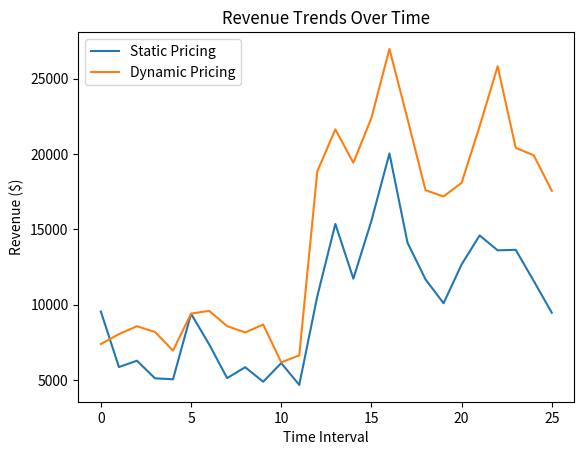

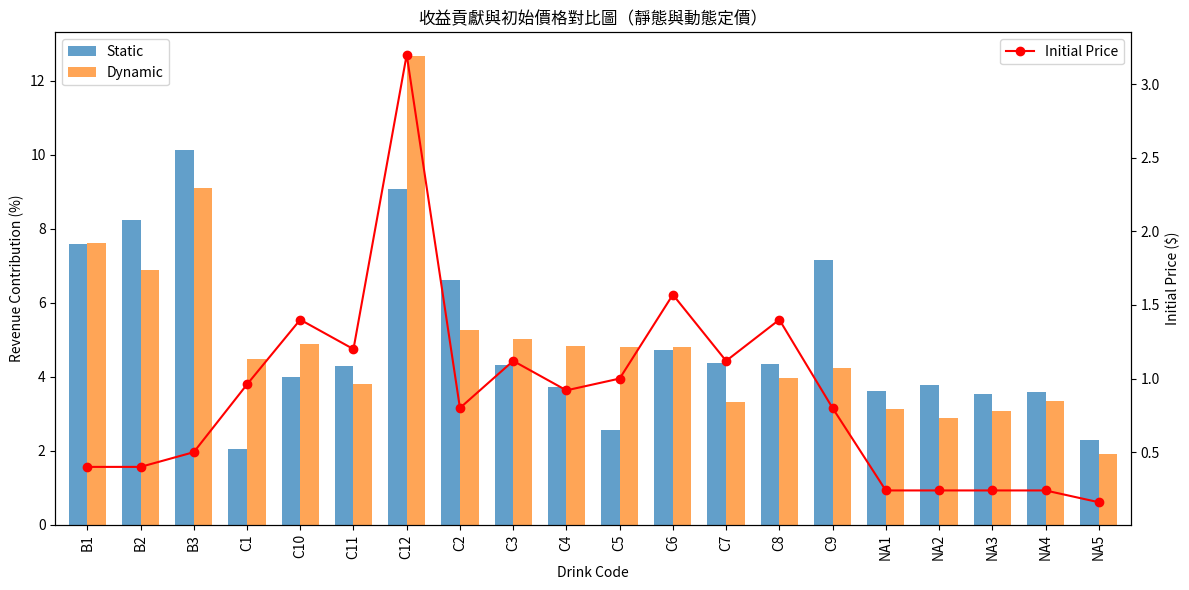

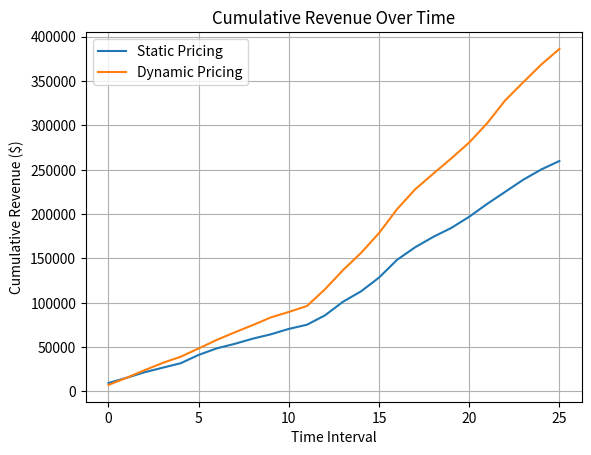

In [11]:
def analyze_revenue_contribution(intervals_data, prices_df):
    """
    分析各飲品在靜態和動態定價中的收益貢獻。
    """
    # 初始化各飲品的收益字典
    revenue_contributions = {code: 0 for code in initial_price_df['code']}
    time_interval_revenue = []  # 用於記錄每個時段的收益

    for interval in intervals_data:
        interval_revenue = 0
        for code, volume in interval["sales_volume"].items():
            price = interval["prices"].get(code, 0)
            interval_revenue += volume * price
            revenue_contributions[code] += volume * price
        time_interval_revenue.append(interval_revenue)

    # 計算收益佔比
    total_revenue = sum(revenue_contributions.values())
    revenue_percentage = {
        code: (revenue / total_revenue) * 100 if total_revenue > 0 else 0
        for code, revenue in revenue_contributions.items()
    }

    return revenue_contributions, revenue_percentage, time_interval_revenue

# 靜態定價與動態定價模擬
static_prices = initial_price_df.copy()
dynamic_prices = initial_price_df.copy()

static_revenue, static_intervals_data, _, _, _, static_customer_arrivals = simulate_day(static_prices,base_customers, dynamic_pricing=False)
dynamic_revenue, dynamic_intervals_data, _, _, _, dynamic_customer_arrivals = simulate_day(dynamic_prices,base_customers, dynamic_pricing=True)

# 分析靜態與動態收益貢獻
static_contributions, static_percentage, static_interval_revenue = analyze_revenue_contribution(static_intervals_data, static_prices)
dynamic_contributions, dynamic_percentage, dynamic_interval_revenue = analyze_revenue_contribution(dynamic_intervals_data, dynamic_prices)

# 打印對比分析結果
print("\n靜態定價各飲品收益貢獻（美元）:")
print(pd.DataFrame.from_dict(static_contributions, orient='index', columns=['Revenue']).sort_values(by='Revenue', ascending=False))

print("\n靜態定價各飲品收益佔比（%）:")
print(pd.DataFrame.from_dict(static_percentage, orient='index', columns=['Percentage']).sort_values(by='Percentage', ascending=False))

print("\n動態定價各飲品收益貢獻（美元）:")
print(pd.DataFrame.from_dict(dynamic_contributions, orient='index', columns=['Revenue']).sort_values(by='Revenue', ascending=False))

print("\n動態定價各飲品收益佔比（%）:")
print(pd.DataFrame.from_dict(dynamic_percentage, orient='index', columns=['Percentage']).sort_values(by='Percentage', ascending=False))

# 繪製收益隨時間變化圖
def plot_revenue_trends(static_revenue, dynamic_revenue):
    time_intervals = list(range(len(static_revenue)))
    plt.plot(time_intervals, static_revenue, label="Static Pricing")
    plt.plot(time_intervals, dynamic_revenue, label="Dynamic Pricing")
    plt.xlabel('Time Interval')
    plt.ylabel('Revenue ($)')
    plt.title('Revenue Trends Over Time')
    plt.legend()
    plt.show()

plot_revenue_trends(static_interval_revenue, dynamic_interval_revenue)

# 繪製收益貢獻對比圖
# def plot_revenue_contribution(static_percentage, dynamic_percentage):
#     static_df = pd.DataFrame.from_dict(static_percentage, orient='index', columns=['Static'])
#     dynamic_df = pd.DataFrame.from_dict(dynamic_percentage, orient='index', columns=['Dynamic'])
#     combined_df = static_df.join(dynamic_df, how='outer').fillna(0)
#     combined_df.plot(kind='bar', figsize=(12, 6))
#     plt.xlabel('Drink Code')
#     plt.ylabel('Revenue Contribution (%)')
#     plt.title('Revenue Contribution Comparison (Static vs Dynamic Pricing)')
#     plt.legend()
#     plt.tight_layout()
#     plt.show()

# plot_revenue_contribution(static_percentage, dynamic_percentage)

# 繪製收益貢獻對比圖，加入飲品初始價格
def plot_revenue_contribution_with_prices(static_percentage, dynamic_percentage, initial_prices):
    # 將靜態與動態收益百分比轉為 DataFrame
    static_df = pd.DataFrame.from_dict(static_percentage, orient='index', columns=['Static'])  # 靜態收益百分比
    dynamic_df = pd.DataFrame.from_dict(dynamic_percentage, orient='index', columns=['Dynamic'])  # 動態收益百分比
    prices_df = pd.DataFrame.from_dict(initial_prices, orient='index', columns=['Initial Price'])  # 初始價格

    # 合併靜態、動態收益百分比與初始價格
    combined_df = static_df.join(dynamic_df, how='outer').fillna(0)  # 合併靜態與動態收益百分比
    combined_df = combined_df.join(prices_df, how='outer').fillna(0)  # 加入初始價格數據

    # 繪製柱狀圖 (靜態與動態收益百分比)
    ax = combined_df[['Static', 'Dynamic']].plot(kind='bar', figsize=(12, 6), width=0.7, alpha=0.7)

    # 在同一圖表上添加折線圖 (初始價格)
    ax2 = ax.twinx()  # 建立雙 Y 軸
    combined_df['Initial Price'].plot(kind='line', color='red', marker='o', ax=ax2)  # 折線圖顯示初始價格

    # 設定圖表的標籤與標題
    ax.set_xlabel('Drink Code')  # X 軸標籤
    ax.set_ylabel('Revenue Contribution (%)')  # 左側 Y 軸標籤 (收益百分比)
    ax2.set_ylabel('Initial Price ($)')  # 右側 Y 軸標籤 (初始價格)
    plt.title('收益貢獻與初始價格對比圖（靜態與動態定價）')  # 圖表標題
    ax.legend(loc='upper left')  # 靜態與動態柱狀圖圖例位置
    ax2.legend(['Initial Price'], loc='upper right')  # 初始價格折線圖圖例位置
    plt.tight_layout()  # 自動調整排版，避免標籤重疊
    plt.show()

# 從 initial_price_df 提取初始價格數據
initial_prices = dict(zip(initial_price_df['code'], initial_price_df['price']))

# 繪製收益貢獻與初始價格對比圖
plot_revenue_contribution_with_prices(static_percentage, dynamic_percentage, initial_prices)


def plot_cumulative_revenue(static_interval_revenue, dynamic_interval_revenue):
    """
    繪製靜態與動態定價的累積收益圖表。
    """
    # 計算累積收益
    static_cumulative_revenue = np.cumsum(static_interval_revenue)
    dynamic_cumulative_revenue = np.cumsum(dynamic_interval_revenue)

    # 繪製圖表
    plt.plot(static_cumulative_revenue, label="Static Pricing")
    plt.plot(dynamic_cumulative_revenue, label="Dynamic Pricing")
    plt.xlabel('Time Interval')
    plt.ylabel('Cumulative Revenue ($)')
    plt.title('Cumulative Revenue Over Time')
    plt.legend()
    plt.grid(True)
    plt.show()

# 繪製累積收益圖表
plot_cumulative_revenue(static_interval_revenue, dynamic_interval_revenue)


# 模擬50次

靜態定價平均收益: 272182.01, 標準差: 8361.71
動態定價平均收益: 377778.92, 標準差: 12537.31


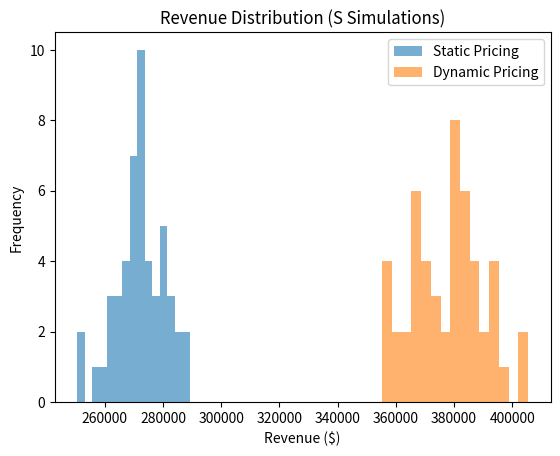

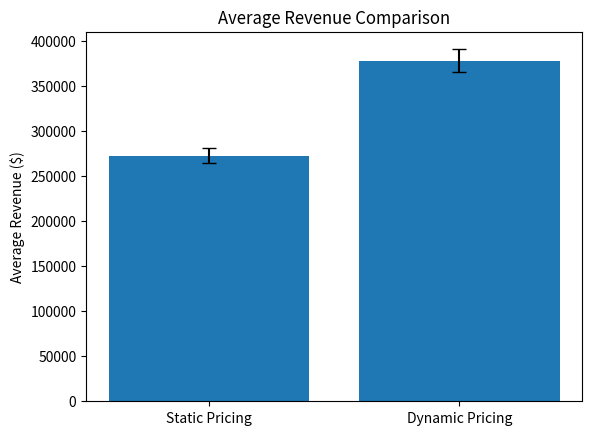

In [17]:
def simulate_multiple_days(prices, S=50):
    """
    模擬 S 次每日運營，並計算平均收益和統計數據。
    """
    static_revenues = []
    dynamic_revenues = []

    for _ in range(S):
        # 靜態定價模擬
        static_prices = prices.copy()
        static_revenue, _, _, _, _, _ = simulate_day(static_prices,base_customers, dynamic_pricing=False)
        static_revenues.append(static_revenue)

        # 動態定價模擬
        dynamic_prices = prices.copy()
        dynamic_revenue, _, _, _, _, _ = simulate_day(dynamic_prices,base_customers, dynamic_pricing=True)
        dynamic_revenues.append(dynamic_revenue)

    return static_revenues, dynamic_revenues

# 模擬 50 次
S = 50
static_revenues, dynamic_revenues = simulate_multiple_days(initial_price_df, S=S)

# 計算平均收益
avg_static_revenue = np.mean(static_revenues)
avg_dynamic_revenue = np.mean(dynamic_revenues)

# 計算收益標準差
std_static_revenue = np.std(static_revenues)
std_dynamic_revenue = np.std(dynamic_revenues)

# 打印結果
print(f"靜態定價平均收益: {avg_static_revenue:.2f}, 標準差: {std_static_revenue:.2f}")
print(f"動態定價平均收益: {avg_dynamic_revenue:.2f}, 標準差: {std_dynamic_revenue:.2f}")

# 繪製收益分布圖
def plot_revenue_distribution(static_revenues, dynamic_revenues):
    """
    繪製靜態與動態定價的收益分布圖。
    """
    plt.hist(static_revenues, bins=15, alpha=0.6, label='Static Pricing')
    plt.hist(dynamic_revenues, bins=15, alpha=0.6, label='Dynamic Pricing')
    plt.xlabel('Revenue ($)')
    plt.ylabel('Frequency')
    plt.title('Revenue Distribution (S Simulations)')
    plt.legend()
    plt.show()

# 繪製收益分布圖
plot_revenue_distribution(static_revenues, dynamic_revenues)

# 繪製平均收益對比圖
def plot_average_revenue_comparison(avg_static_revenue, avg_dynamic_revenue):
    """
    繪製靜態與動態定價的平均收益對比圖。
    """
    plt.bar(['Static Pricing', 'Dynamic Pricing'], [avg_static_revenue, avg_dynamic_revenue], yerr=[std_static_revenue, std_dynamic_revenue], capsize=5)
    plt.ylabel('Average Revenue ($)')
    plt.title('Average Revenue Comparison')
    plt.show()

# 繪製平均收益對比圖
plot_average_revenue_comparison(avg_static_revenue, avg_dynamic_revenue)


# 不同客人類型比例模擬 S 次，並比較結果。


模擬場景 1 - 顧客比例: {'price_sensitive': 0.2, 'trend_follower': 0.3, 'price_indifferent': 0.5}

模擬場景 2 - 顧客比例: {'price_sensitive': 0.4, 'trend_follower': 0.3, 'price_indifferent': 0.3}

模擬場景 3 - 顧客比例: {'price_sensitive': 0.2, 'trend_follower': 0.5, 'price_indifferent': 0.3}

模擬場景 4 - 顧客比例: {'price_sensitive': 0.1, 'trend_follower': 0.2, 'price_indifferent': 0.7}


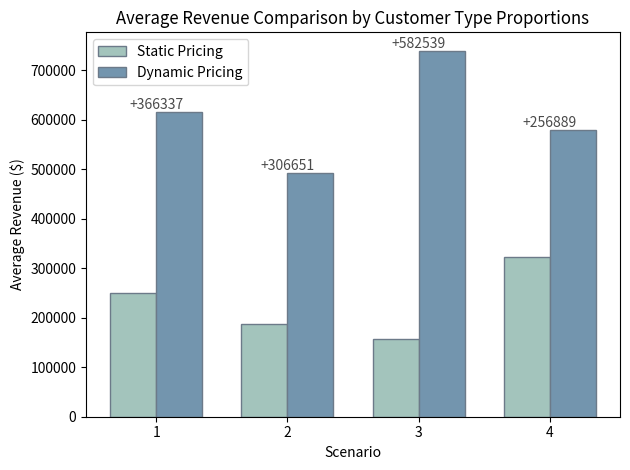

客人類型比例對模擬結果的影響:
   Scenario                                            Weights  \
0         1  {'price_sensitive': 0.2, 'trend_follower': 0.3...   
1         2  {'price_sensitive': 0.4, 'trend_follower': 0.3...   
2         3  {'price_sensitive': 0.2, 'trend_follower': 0.5...   
3         4  {'price_sensitive': 0.1, 'trend_follower': 0.2...   

   Avg Static Revenue  Std Static Revenue  Avg Dynamic Revenue  \
0       249216.640403         5939.118368        615553.580577   
1       186778.069496         5484.140231        493429.497721   
2       157471.147148         5439.501494        740010.170929   
3       323028.141203         8036.015293        579917.444155   

   Std Dynamic Revenue  
0         18608.273821  
1         26963.585380  
2         33672.372631  
3         23384.208438  


In [33]:

def simulate_with_different_weights(price_df, S=50, weight_scenarios=None):
    """
    根據不同客人類型比例模擬 S 次，並比較結果。

    Parameters:
        price_df: 初始價格表
        S: 每組比例的模擬次數
        weight_scenarios: 不同客人類型比例的場景 (列表)
    """
    if weight_scenarios is None:
        weight_scenarios = [
            {"price_sensitive": 0.4, "trend_follower": 0.1, "price_indifferent": 0.5},  # 原始比例
            {"price_sensitive": 0.6, "trend_follower": 0.1, "price_indifferent": 0.3},  # 增加價格敏感型
            {"price_sensitive": 0.3, "trend_follower": 0.2, "price_indifferent": 0.5},  # 增加追高型
            {"price_sensitive": 0.2, "trend_follower": 0.1, "price_indifferent": 0.7},  # 增加價格無感型
        ]

    results = []
    for i, weights in enumerate(weight_scenarios):
        global type_people_weights  # 修改全局比例
        type_people_weights = weights
        print(f"\n模擬場景 {i + 1} - 顧客比例: {weights}")

        static_revenues, dynamic_revenues = simulate_multiple_days(initial_price_df, 20)

        avg_static = np.mean(static_revenues)
        avg_dynamic = np.mean(dynamic_revenues)
        std_static = np.std(static_revenues)
        std_dynamic = np.std(dynamic_revenues)

        results.append({
            "Scenario": i + 1,
            "Weights": weights,
            "Avg Static Revenue": avg_static,
            "Std Static Revenue": std_static,
            "Avg Dynamic Revenue": avg_dynamic,
            "Std Dynamic Revenue": std_dynamic,
        })

    return results

# 執行模擬
weight_scenarios = [
    {"price_sensitive": 0.2, "trend_follower": 0.3, "price_indifferent": 0.5},  # 原始比例
    {"price_sensitive": 0.4, "trend_follower": 0.3, "price_indifferent": 0.3},  # 增加價格敏感型
    {"price_sensitive": 0.2, "trend_follower": 0.5, "price_indifferent": 0.3},  # 增加追高型
    {"price_sensitive": 0.1, "trend_follower": 0.2, "price_indifferent": 0.7},  # 增加價格無感型
]

results = simulate_with_different_weights(initial_price_df, S=50, weight_scenarios=weight_scenarios)

# 將結果轉為 DataFrame 並顯示
results_df = pd.DataFrame(results)

# 繪製對比圖
def plot_revenue_comparison(results_df):
    """
    繪製不同比例場景下的收益對比圖。
    """
    scenarios = results_df["Scenario"]
    avg_static = results_df["Avg Static Revenue"]
    avg_dynamic = results_df["Avg Dynamic Revenue"]
    revenue_diff = avg_dynamic - avg_static

    x = np.arange(len(scenarios))
    width = 0.35

    fig, ax = plt.subplots()
    bar1 = ax.bar(x - width / 2, avg_static, width, label='Static Pricing', color='#A3C4BC', edgecolor='#6C7A89')
    bar2 = ax.bar(x + width / 2, avg_dynamic, width, label='Dynamic Pricing', color='#7395AE', edgecolor='#6C7A89')

    # 顯示數值差異
    for i in range(len(scenarios)):
        ax.text(x[i], avg_dynamic[i] + 10, f"+{revenue_diff[i]:.0f}",
                ha='center', va='bottom', fontsize=10, color='#4A4A4A', fontweight='bold')
    ax.set_xlabel('Scenario')
    ax.set_ylabel('Average Revenue ($)')
    ax.set_title('Average Revenue Comparison by Customer Type Proportions')
    ax.set_xticks(x)
    ax.set_xticklabels(scenarios)
    ax.legend()

    plt.tight_layout()
    plt.show()

# 繪製收益對比圖
plot_revenue_comparison(results_df)

# 將結果轉為 DataFrame 並顯示
results_df = pd.DataFrame(results)

# 顯示結果
print("客人類型比例對模擬結果的影響:")
print(results_df)

# 模擬不同客流量

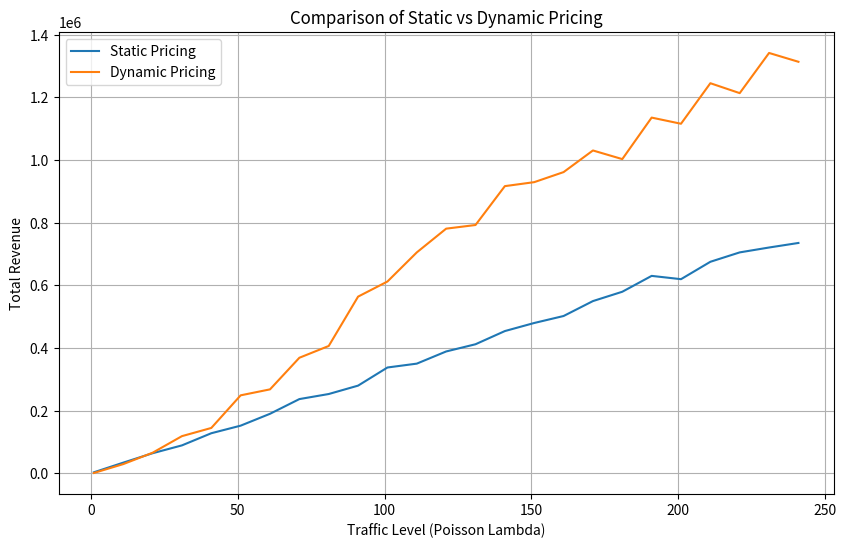

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.stats import beta

np.random.seed(5566)

def simulate_day(prices, dynamic_pricing=True, traffic_level=100):
    cumulative_sales = {code: 0 for code in initial_price_df['code']}
    total_revenue = 0
    all_intervals_data = []  # 用於記錄每個半小時的詳細數據

    total_drink_selection = {code: 0 for code in initial_price_df['code']}
    people_type_count = {"price_sensitive": 0, "trend_follower": 0, "price_indifferent": 0}

    previous_prices = prices.set_index('code')['price'].to_dict()  # 記錄初始價格

    for interval in range(num_intervals):
        # 傳遞 traffic_level 給 simulate_half_hour_demand
        demand, budget_records = simulate_half_hour_demand(
            prices.set_index('code')['price'].to_dict(), interval, previous_prices, traffic_level
        )

        if dynamic_pricing:  # 僅在動態定價模式下調整價格
            previous_prices = prices.set_index('code')['price'].to_dict()

        if not demand.empty:
            drink_counts = demand['code'].value_counts().to_dict()
            for code, count in drink_counts.items():
                total_drink_selection[code] += count

            if 'customer_type' in demand.columns:
                people_counts = demand['customer_type'].value_counts().to_dict()
                for customer_type, count in people_counts.items():
                    if customer_type in people_type_count:
                        people_type_count[customer_type] += count

        sales_volume = demand.groupby('code')['volume_ml'].sum().to_dict() if not demand.empty else {}
        revenue = sum(sales_volume.get(drink_code, 0) * prices.loc[prices['code'] == drink_code, 'price'].values[0] for drink_code in prices['code'])
        total_revenue += revenue

        if dynamic_pricing:  # 僅在動態定價模式下調整價格
            adjust_prices(prices, sales_volume,cumulative_sales)

        interval_data = {
            "interval": interval,
            "sales_volume": sales_volume,
            "cumulative_sales": cumulative_sales.copy(),
            "prices": prices.set_index('code')['price'].to_dict(),
            "revenue": revenue,
            "sales_volume": sales_volume.copy()
        }
        all_intervals_data.append(interval_data)

    return total_revenue, all_intervals_data, total_drink_selection, people_type_count, budget_records

# 調整 base_customers 為從 poisson(1) 到 poisson(250)
def simulate_half_hour_demand(prices, time_slot, previous_prices, traffic_level):
    demand_data = []
    budget_records = {"price_sensitive": [], "trend_follower": [], "price_indifferent": []}
    expanded_preferences = get_expanded_drink_preferences()  # 獲取展開後的具體飲品偏好
    time_slot_weights = [1, 0.8, 2, 1.5]  # 午餐高峰、下午平緩、晚餐高峰、晚間休閒
    period_index = min(time_slot // 6, len(time_slot_weights) - 1)  # 每6個時段屬於一個時間段

    # 動態調整客流量基於 traffic_level
    base_customers = int(np.random.poisson(traffic_level) * time_slot_weights[period_index])

    for _ in range(base_customers):
        if np.random.choice([0, 1], p=[0.2, 0.8]) == 0:
            continue  # 該顧客選擇不喝酒水

        customer_type = np.random.choice(list(type_people_weights.keys()), p=list(type_people_weights.values()))
        total_demand = np.random.normal(600, 100)
        budget = generate_budget(customer_type)
        budget_records[customer_type].append(budget)
        total_demand = min(total_demand, budget)

        if customer_type == "price_indifferent":
            preferences = np.random.choice(
                list(expanded_preferences.keys()), p=[0.3, 0.2, 0.3, 0.2]
            )
            selected_drink = np.random.choice(
                list(expanded_preferences[preferences].keys()),
                p=list(expanded_preferences[preferences].values())
            )
            volume = total_demand
            demand_data.append({"code": selected_drink, "volume_ml": volume, "customer_type": customer_type, "budget": budget})
        elif customer_type == "price_sensitive":
            price_sorted = sorted(prices.items(), key=lambda x: x[1])
            top_five_drinks = price_sorted[:10]
            selected_drink = np.random.choice([drink[0] for drink in top_five_drinks])
            demand_data.append({"code": selected_drink, "volume_ml": total_demand, "customer_type": customer_type, "budget": budget})
        elif customer_type == "trend_follower":
            increased_price_drinks = [
                code for code in prices.keys()
                if previous_prices.get(code, prices[code]) < prices[code]
            ]

            if increased_price_drinks:
                selected_drink = np.random.choice(increased_price_drinks)
                demand_data.append({"code": selected_drink, "volume_ml": total_demand, "customer_type": customer_type, "budget": budget})

    return pd.DataFrame(demand_data), budget_records

# 模擬多個客流量情境
traffic_levels = range(1, 251, 10)  # 測試 poisson(lambda=1) 到 poisson(lambda=250)
results = []

for traffic_level in traffic_levels:
    static_prices = initial_price_df.copy()
    dynamic_prices = initial_price_df.copy()

    static_revenue, _, _, _, _ = simulate_day(static_prices, dynamic_pricing=False, traffic_level=traffic_level)
    dynamic_revenue, _, _, _, _ = simulate_day(dynamic_prices, dynamic_pricing=True, traffic_level=traffic_level)

    results.append({
        "traffic_level": traffic_level,
        "static_revenue": static_revenue,
        "dynamic_revenue": dynamic_revenue
    })

# 結果視覺化
results_df = pd.DataFrame(results)
plt.figure(figsize=(10, 6))
plt.plot(results_df["traffic_level"], results_df["static_revenue"], label="Static Pricing")
plt.plot(results_df["traffic_level"], results_df["dynamic_revenue"], label="Dynamic Pricing")
plt.xlabel("Traffic Level (Poisson Lambda)")
plt.ylabel("Total Revenue")
plt.title("Comparison of Static vs Dynamic Pricing")
plt.legend()
plt.grid()
plt.show()


# 其他ppt需要的圖(無關模擬)

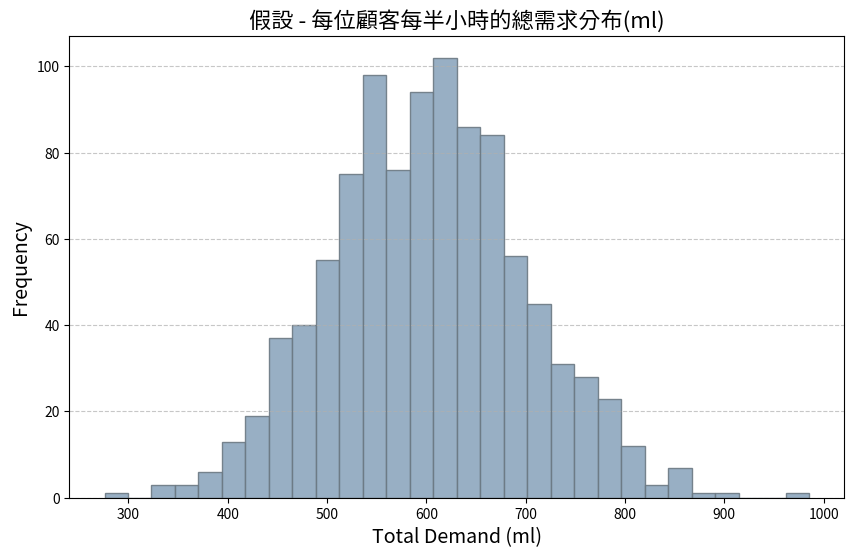

In [24]:

import numpy as np
import matplotlib.pyplot as plt

# 生成需求數據
np.random.seed(42)  # 固定隨機種子以便重現
customer_demand = np.random.normal(600, 100, 1000)  # 1000位顧客的需求數據

# 設置莫蘭迪色系
plt.figure(figsize=(10, 6))
plt.hist(customer_demand, bins=30, color='#8DA7BE', edgecolor='#6C7983', alpha=0.9)
plt.title('假設 - 每位顧客每半小時的總需求分布(ml)', fontsize=16, fontweight='bold')
plt.xlabel('Total Demand (ml)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 顯示圖表
plt.show()

